In [1]:
import numpy as np
import Example_matrices as ex
import dynamic_low_rank as dlr
import time_integration_low_rank as tilr
import Variable_step_size_integrator as vssi
import matplotlib.pyplot as plt

### Oppgave 3 

In [2]:
def g(x,y):
    return np.sin(np.pi*x)*np.sin(2*np.pi*y)

def u_exact(x,y,t):
    return np.exp(-5*np.pi**2*t)*np.sin(np.pi*x)*np.sin(2*np.pi*y)

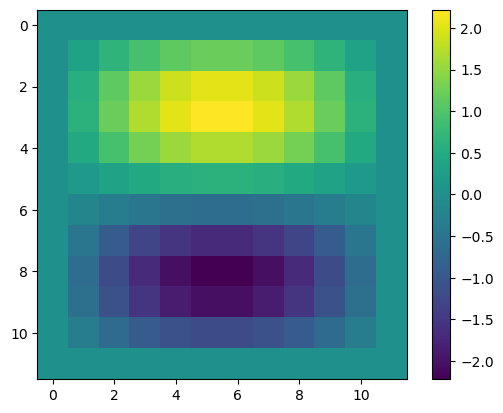

In [3]:
# test av oppgave 3

tol = 1.e-3
t0 = 0
tf = 0.02
h0 = 0.04 # initial step size in vssi
N = 12
k = 12 # k- rank approx

# def grid
x = np.linspace(0,1,N)
y = np.linspace(0,1,N)
X,Y = np.meshgrid(x,y)

# def exact soln in t0
u_ex_0 = u_exact(X,Y,t0)
u_ex_f = u_exact(X,Y,tf)

#print(u_ex_0)

# Initialize u and u_dot
m,n = N,N
u0 = tilr.u_fun(g,m,n) 
u_dot = tilr.u_dot_fun(g,m,n)

# specify what method to use
method = tilr.second_order_method

# do method
Y,j = vssi.variable_solver(t0,tf,u0,tol,h0,method,k)

Yt = vssi.format_result(u_dot,Y)

plt.imshow(Yt[-1,:,]-u_ex_f)
plt.colorbar()


# Oppgave 4

In [4]:
t0 = 0
h = 0.1
tol = 1.e-2
k = 50
tf = 0.2

A = ex.A(0)
U,s,Vt = np.linalg.svd(A)
S = np.diag(s)
A_f = ex.A(tf)

method = dlr.second_order_method
Y,j = vssi.variable_solver(t0,tf,A,tol,h,method,k)
Yt = vssi.format_result(A,Y)

# Yt er en rank k approx av A og vil dermed ikke være like selv ved t0, men burde kansje være nærmere enn det den er nå
print(np.linalg.norm(Yt[0,:,:]-A)) 
print(np.linalg.norm(Yt[-1,:,:]-A_f))


58.03316093398614
17.00724968160195


In [5]:
t0 = 0
h = 0.1
tol = 1.e-5
k = 50
tf = 0.2

A0 = ex.A(t0)
method = dlr.second_order_method

Y,j = vssi.variable_solver(t0,tf,A0,tol,h,method,k)
Yt = vssi.format_result(A0,Y)

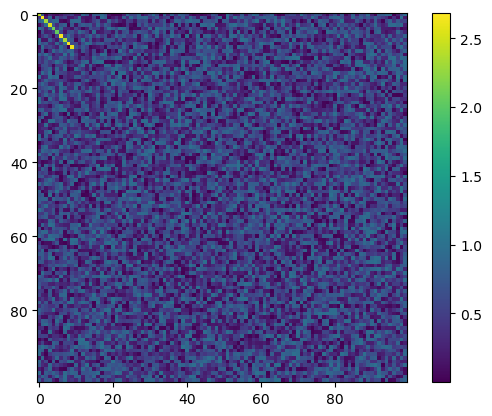

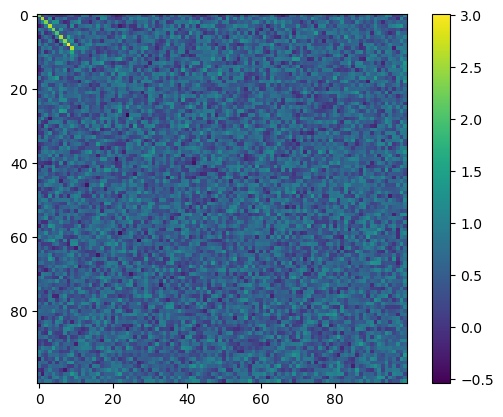

In [6]:
plt.imshow(A0)
plt.colorbar()
plt.show()
plt.imshow(Yt[-1,:,:])
plt.colorbar()
plt.show()